<a href="https://colab.research.google.com/github/Hadiqapieas/Leukemia-Data-classification/blob/ResNet101/ResNet101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip Original.zip

Archive:  Original.zip
   creating: Pro/
  inflating: Pro/WBC-Malignant-Pro-001.jpg  
  inflating: Pro/WBC-Malignant-Pro-002.jpg  
  inflating: Pro/WBC-Malignant-Pro-003.jpg  
  inflating: Pro/WBC-Malignant-Pro-004.jpg  
  inflating: Pro/WBC-Malignant-Pro-005.jpg  
  inflating: Pro/WBC-Malignant-Pro-006.jpg  
  inflating: Pro/WBC-Malignant-Pro-007.jpg  
  inflating: Pro/WBC-Malignant-Pro-008.jpg  
  inflating: Pro/WBC-Malignant-Pro-009.jpg  
  inflating: Pro/WBC-Malignant-Pro-010.jpg  
  inflating: Pro/WBC-Malignant-Pro-011.jpg  
  inflating: Pro/WBC-Malignant-Pro-012.jpg  
  inflating: Pro/WBC-Malignant-Pro-013.jpg  
  inflating: Pro/WBC-Malignant-Pro-014.jpg  
  inflating: Pro/WBC-Malignant-Pro-015.jpg  
  inflating: Pro/WBC-Malignant-Pro-016.jpg  
  inflating: Pro/WBC-Malignant-Pro-017.jpg  
  inflating: Pro/WBC-Malignant-Pro-018.jpg  
  inflating: Pro/WBC-Malignant-Pro-019.jpg  
  inflating: Pro/WBC-Malignant-Pro-020.jpg  
  inflating: Pro/WBC-Malignant-Pro-021.jpg  
  inflating: P

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import shutil
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,  ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
# Defining paths to dataset directories
dataset_dir = 'Original'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')

# Creating the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Moving images from early, pre, and pro directories to malignant directory
for stage in ['Early', 'Pre', 'Pro']:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory

In [6]:
# Defining paths to your dataset directories
dataset_dir = '/content'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')  # Create this directory if it doesn't exist

# Creating the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Defining paths for stages that need to be moved to Malignant
stages = ['Early', 'Pre', 'Pro']

# Moving images from early, pre, and pro directories to malignant directory
for stage in stages:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory
    else:
        print(f"Directory {stage_dir} does not exist.")
        # List contents of the 'content' directory
!ls /content
# List files in Benign and Malignant directories
!ls /content/Benign
!ls /Original/Malignant
# Defining paths for new dataset splits
train_dir = '/content/train_dataset'
val_dir = '/content/validation_dataset'
test_dir = '/content/test_dataset'

# Creating directories for dataset splits
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    for category in ['Benign', 'Malignant']:
        os.makedirs(os.path.join(directory, category), exist_ok=True)

# Spliting dataset and copy images
for category_dir, category in [(benign_dir, 'Benign'), (malignant_dir, 'Malignant')]:
    if os.path.exists(category_dir):  # Ensure directory exists
        image_files = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]
        train_files, test_val_files = train_test_split(image_files, test_size=0.3, random_state=42)
        val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

        for file in train_files:
            shutil.copy(file, os.path.join(train_dir, category))
        for file in val_files:
            shutil.copy(file, os.path.join(val_dir, category))
        for file in test_files:
            shutil.copy(file, os.path.join(test_dir, category))
    else:
      print(f"Directory {category_dir} does not exist.")


Benign	Malignant  Original  Original.zip  sample_data
WBC-Benign-001.jpg  WBC-Benign-102.jpg	WBC-Benign-203.jpg  WBC-Benign-304.jpg	WBC-Benign-405.jpg
WBC-Benign-002.jpg  WBC-Benign-103.jpg	WBC-Benign-204.jpg  WBC-Benign-305.jpg	WBC-Benign-406.jpg
WBC-Benign-003.jpg  WBC-Benign-104.jpg	WBC-Benign-205.jpg  WBC-Benign-306.jpg	WBC-Benign-407.jpg
WBC-Benign-004.jpg  WBC-Benign-105.jpg	WBC-Benign-206.jpg  WBC-Benign-307.jpg	WBC-Benign-408.jpg
WBC-Benign-005.jpg  WBC-Benign-106.jpg	WBC-Benign-207.jpg  WBC-Benign-308.jpg	WBC-Benign-409.jpg
WBC-Benign-006.jpg  WBC-Benign-107.jpg	WBC-Benign-208.jpg  WBC-Benign-309.jpg	WBC-Benign-410.jpg
WBC-Benign-007.jpg  WBC-Benign-108.jpg	WBC-Benign-209.jpg  WBC-Benign-310.jpg	WBC-Benign-411.jpg
WBC-Benign-008.jpg  WBC-Benign-109.jpg	WBC-Benign-210.jpg  WBC-Benign-311.jpg	WBC-Benign-412.jpg
WBC-Benign-009.jpg  WBC-Benign-110.jpg	WBC-Benign-211.jpg  WBC-Benign-312.jpg	WBC-Benign-413.jpg
WBC-Benign-010.jpg  WBC-Benign-111.jpg	WBC-Benign-212.jpg  WBC-Benign-313

In [7]:
#Data loading and processing
# Definition of transformations for training, validation, and testing data
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Creating datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_test_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transform)

# Creating data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [8]:
# Loading the pre-trained ResNet101 model
model = models.resnet101(pretrained=True)

# Freezing parameters of the pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Modifying the final fully connected layer for binary classification
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # Binary classification with 2 output units

# Moving model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Only train the final layer


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 165MB/s]


Epoch 1/10, Training Loss: 0.2293, Training Accuracy: 0.9091, Validation Loss: 0.1115, Validation Accuracy: 0.9714
Epoch 2/10, Training Loss: 0.0982, Training Accuracy: 0.9680, Validation Loss: 0.0771, Validation Accuracy: 0.9816
Epoch 3/10, Training Loss: 0.0685, Training Accuracy: 0.9776, Validation Loss: 0.0748, Validation Accuracy: 0.9796
Epoch 4/10, Training Loss: 0.0607, Training Accuracy: 0.9794, Validation Loss: 0.0596, Validation Accuracy: 0.9796
Epoch 5/10, Training Loss: 0.0534, Training Accuracy: 0.9816, Validation Loss: 0.0439, Validation Accuracy: 0.9918
Epoch 6/10, Training Loss: 0.0450, Training Accuracy: 0.9886, Validation Loss: 0.0378, Validation Accuracy: 0.9857
Epoch 7/10, Training Loss: 0.0388, Training Accuracy: 0.9903, Validation Loss: 0.0343, Validation Accuracy: 0.9898
Epoch 8/10, Training Loss: 0.0457, Training Accuracy: 0.9842, Validation Loss: 0.0340, Validation Accuracy: 0.9898
Epoch 9/10, Training Loss: 0.0353, Training Accuracy: 0.9925, Validation Loss: 0

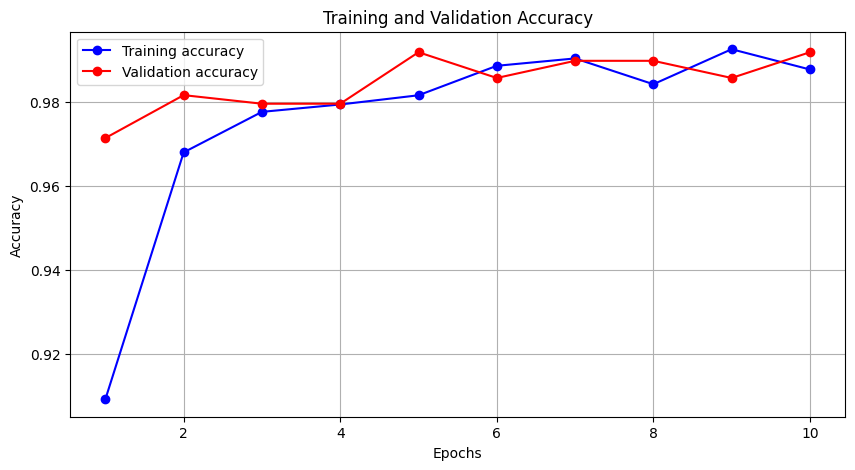

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Function to plot training and validation accuracy
def plot_training_results(train_acc_history, val_acc_history):
    epochs = range(1, len(train_acc_history) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_acc_history, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc_history, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Training loop
num_epochs = 10
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct_train / total_train
    train_acc_history.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = correct_val / total_val
    val_acc_history.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Ploting training results
plot_training_results(train_acc_history, val_acc_history)


In [10]:
#Model evaluation
# Assuming train_loader, val_loader, and test_loader are already defined from previous steps

def evaluate_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (preds == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    accuracy = correct / total
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

# Ensuring to call the function with the test loader
evaluate_model(model, test_loader, device)



Accuracy: 0.9939
Precision: 0.9964
Recall: 0.9803
F1-score: 0.9881


Accuracy: 0.9939
Precision: 0.9964
Recall: 0.9803
F1-score: 0.9881
Confusion Matrix:
[[ 73   3]
 [  0 413]]


<Figure size 1000x700 with 0 Axes>

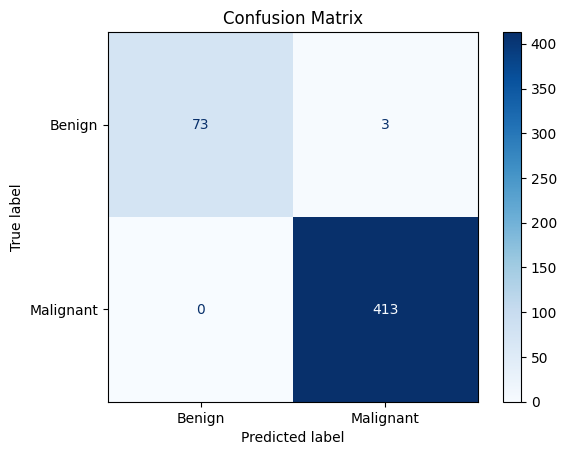

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98        76
   Malignant       0.99      1.00      1.00       413

    accuracy                           0.99       489
   macro avg       1.00      0.98      0.99       489
weighted avg       0.99      0.99      0.99       489

Accuracy: 0.9939
Precision: 0.9964
Recall: 0.9803
F1-score: 0.9881
Confusion Matrix:
[[ 73   3]
 [  0 413]]


<Figure size 1000x700 with 0 Axes>

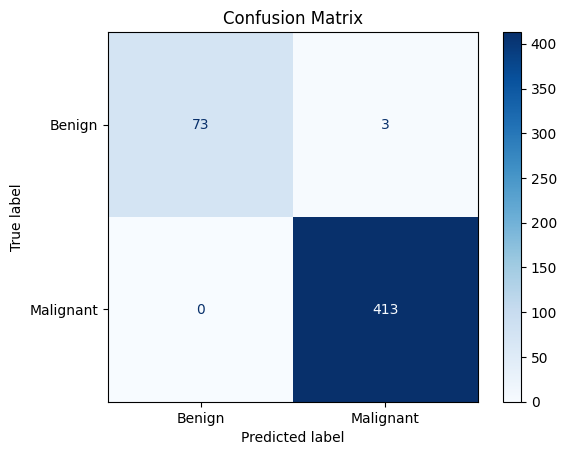

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98        76
   Malignant       0.99      1.00      1.00       413

    accuracy                           0.99       489
   macro avg       1.00      0.98      0.99       489
weighted avg       0.99      0.99      0.99       489

Accuracy: 0.9939
Precision: 0.9964
Recall: 0.9803
F1-score: 0.9881
Confusion Matrix:
[[ 73   3]
 [  0 413]]


<Figure size 1000x700 with 0 Axes>

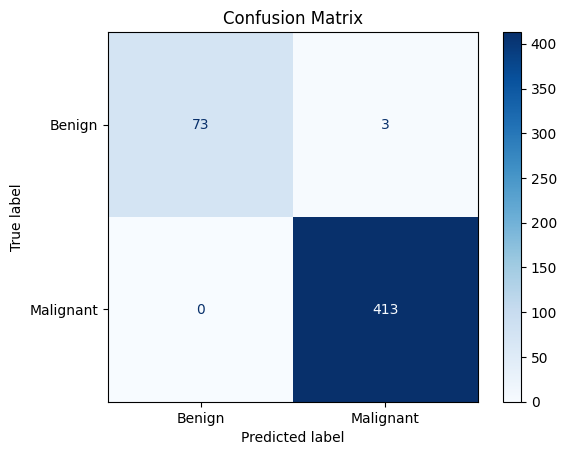

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98        76
   Malignant       0.99      1.00      1.00       413

    accuracy                           0.99       489
   macro avg       1.00      0.98      0.99       489
weighted avg       0.99      0.99      0.99       489



In [13]:
def evaluate_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (preds == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    accuracy = correct / total
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

    # Generating the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataloader.dataset.classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Generating the classification report
    class_report = classification_report(all_labels, all_preds, target_names=dataloader.dataset.classes)
    print("Classification Report:")
    print(class_report)
evaluate_model(model, test_loader, device)
# Assuming test_loader is defined earlier in the code
# Create the data loader for the test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Ensure that you pass the correct dataloader
evaluate_model(model, test_loader, device)
# Ensure test_loader is defined properly
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate the model using the test_loader
evaluate_model(model, test_loader, device)
